Add your import statements and the database connection statements in the below code block

Database file path = '/course/data/CSE-578/dinofunworld.db'

In [47]:
# your code here
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates, scatter_matrix

# Connect to the database
db_path = '/course/data/CSE-578/dinofunworld.db'
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

### **Question 1:**
Create a distance matrix suitable for use in hierarchical clustering of the checkin sequences of the 5 specified visitors.

Your distance function should count the number of dissimilarities in the sequences without considering any other factors.

**Note** 
* The distance matrix should be reported as a dictionary of dictionaries (eg. {1: {2:0, 3:0, 4:0}, 2: {1:0, 3:0, ...}, ...}).
* The order of the output is not important.

In [48]:
### TEST FUNCTION: test_question1
# DO NOT REMOVE OR MODIFY THE ABOVE LINE
# your code here

# Visitor IDs
visitor_ids = [165316, 1835254, 296394, 404385, 448990]

# Retrieve sequences for the specified visitors
query = f"""
SELECT visitorID, sequence 
FROM sequences 
WHERE visitorID IN ({','.join(map(str, visitor_ids))});
"""
sequences = pd.read_sql_query(query, conn)

# Create a dictionary of visitor sequences
visitor_sequences = {}
for _, row in sequences.iterrows():
    visitor_id = row['visitorID']
    # Split the sequence by hyphens and convert to integers
    sequence = list(map(int, row['sequence'].split('-')))
    visitor_sequences[visitor_id] = sequence

# Compute the distance matrix
distance_matrix = {}
for v1 in visitor_ids:
    distance_matrix[v1] = {}
    for v2 in visitor_ids:
        if v1 == v2:
            distance_matrix[v1][v2] = 0
        else:
            seq1, seq2 = visitor_sequences[v1], visitor_sequences[v2]
            distance = sum(a != b for a, b in zip(seq1, seq2))
            distance_matrix[v1][v2] = distance

# Output the distance matrix
print(distance_matrix)

{165316: {165316: 0, 1835254: 336, 296394: 318, 404385: 329, 448990: 318}, 1835254: {165316: 336, 1835254: 0, 296394: 282, 404385: 298, 448990: 282}, 296394: {165316: 318, 1835254: 282, 296394: 0, 404385: 303, 448990: 0}, 404385: {165316: 329, 1835254: 298, 296394: 303, 404385: 0, 448990: 303}, 448990: {165316: 318, 1835254: 282, 296394: 0, 404385: 303, 448990: 0}}


### **Question 2:**  
Create and display a Parallel Coordinate Plot displaying the minimum, maximum and average attendance for each ride in the park.

For this question, display a Parallel Coordinate Plot in the notebook and print the data used to create a Parallel Coordinate Plot as a dictionary of dictionaries (eg: {  'Ride1' : {min : 1, max : 3, avg : 2 }, 'Ride2' :{ min : 1, max : 3, avg : 2 } ... })

**Note:** 
* Not all attractions are rides.
* The output should be a dictionary and the order of the output is not important.
* Use the parallel coordinates function from the **pandas library** to generate the graph.
* The Parallel Coordinate plot must have the below mentioned parameters,
    * legend and it should be outside the plot.
    * y-label ('**Attendance**')
    * title named '**Ride Attendance - Minimum, Maximum, Average**'
* The plot must not have the following parameters,
    * do not set figure size
    * do not set font size or font-weight for titles and labels

In [45]:
### TEST FUNCTION: test_question2
# DO NOT REMOVE OR MODIFY THE ABOVE LINE

# Fetch attractions data, filtering only rides
cursor.execute("SELECT AttractionID, Name FROM attraction WHERE LOWER(Category) LIKE '%ride%';")
attraction_name_category_list = cursor.fetchall()

# Fetch sequences data
cursor.execute("SELECT visitorID, sequence FROM sequences;")
sequences = cursor.fetchall()

# Create a DataFrame for sequences
sequence_stats = pd.DataFrame(sequences, columns=['visitor', 'sequence'])
sequence_stats['sequence_list'] = sequence_stats['sequence'].apply(lambda x: list(map(int, x.split('-'))))

# Initialize the output dictionary
output_dict = {}

# Prepare data for the parallel coordinates plot
parallel_data = []

# Compute attendance statistics for each ride
for attraction_id, attraction_name in attraction_name_category_list:
    # Get the number of visitors at the attraction in each time interval
    interval_counts = np.sum(
        sequence_stats['sequence_list'].apply(lambda seq: [1 if x == attraction_id else 0 for x in seq]).tolist(),
        axis=0,
    )

    # Calculate min (non-zero), max, and avg
    nonzero_counts = interval_counts[interval_counts > 0]  # Filter non-zero counts
    if len(nonzero_counts) > 0:
        min_attendance = int(np.min(nonzero_counts))  # Minimum non-zero attendance
        max_attendance = int(np.max(interval_counts))  # Maximum attendance
        avg_attendance = float(np.mean(interval_counts))  # Average includes zeros
    else:
        min_attendance = max_attendance = avg_attendance = 0

    # Add to the output dictionary
    output_dict[attraction_name] = {'min': min_attendance, 'max': max_attendance, 'avg': avg_attendance}

    # Append data for plotting
    parallel_data.append({'ride': attraction_name, 'min': min_attendance, 'max': max_attendance, 'avg': avg_attendance})

# Print the output dictionary
print(output_dict)

# Create a DataFrame for the parallel coordinates plot
parallel_df = pd.DataFrame(parallel_data)

# Generate the parallel coordinates plot
plt.figure()
parallel_coordinates(parallel_df, 'ride', cols=['min', 'max', 'avg'])
plt.ylabel('Attendance')
plt.title('Ride Attendance - Minimum, Maximum, Average')

# Place the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(True)
plt.show()





### **Question 3:**
Create and display a Scatterplot Matrix displaying the minimum, maximum and average attendance for each ride in the park.


**Note:** 
* Print the output values of Question 2 as the same data will be used for Scatterplot.
* The output should be a dictionary (eg: {  'Ride1' : {min : 1, max : 3, avg : 2 }, 'Ride2' :{ min : 1, max : 3, avg : 2 } ... }) and the order of the output is not important.
* This is a different view into the same data as the previous part. Use the scatter plot matrix function from the **pandas library** to generate the graph.
* While you work on these plots, consider the different things that each chart says about the data.
* The Scatterplot must have the below mentioned parameters,
    * title named ' **Scatterplot Matrix - Minimum, Maximum, Average Attendance** '
* The plot must not have the following parameters,
    * legend
    * do not set figure size
    * do not set font size or font-weight for titles and labels

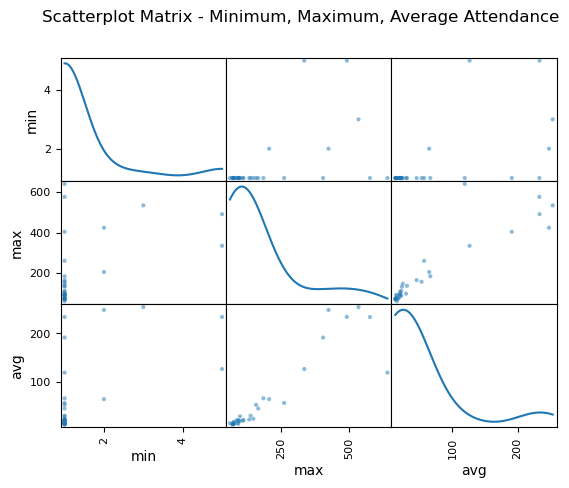

{'Wrightiraptor Mountain': {'min': 1, 'max': 158, 'avg': 52.75}, 'Galactosaurus Rage': {'min': 1, 'max': 261, 'avg': 56.63715277777778}, 'Auvilotops Express': {'min': 1, 'max': 640, 'avg': 118.97916666666667}, 'TerrorSaur': {'min': 2, 'max': 424, 'avg': 248.09375}, 'Wendisaurus Chase': {'min': 5, 'max': 491, 'avg': 233.6875}, 'Keimosaurus Big Spin': {'min': 2, 'max': 206, 'avg': 64.39756944444444}, 'Firefall': {'min': 1, 'max': 576, 'avg': 233.46875}, 'Atmosfear': {'min': 5, 'max': 335, 'avg': 126.359375}, 'North Line': {'min': 1, 'max': 166, 'avg': 45.06944444444444}, 'Jeredactyl Jump': {'min': 1, 'max': 112, 'avg': 21.66840277777778}, 'Sauroma Bumpers': {'min': 1, 'max': 148, 'avg': 23.866319444444443}, 'Flying TyrAndrienkos': {'min': 1, 'max': 98, 'avg': 19.76215277777778}, 'Cyndisaurus Asteroid': {'min': 1, 'max': 72, 'avg': 12.947916666666666}, 'Beelzebufo': {'min': 1, 'max': 93, 'avg': 13.869791666666666}, 'Enchanted Toadstools': {'min': 1, 'max': 77, 'avg': 12.864583333333334}, 

In [46]:
### TEST FUNCTION: test_question3
# DO NOT REMOVE OR MODIFY THE ABOVE LINE

# Convert the dictionary to a DataFrame for visualization
scatter_df = pd.DataFrame.from_dict(output_dict, orient='index').reset_index()
scatter_df.columns = ['ride', 'min', 'max', 'avg']  # Rename the columns appropriately

# Generate the scatterplot matrix
pd.plotting.scatter_matrix(scatter_df[['min', 'max', 'avg']], diagonal='kde', grid=True)
plt.suptitle('Scatterplot Matrix - Minimum, Maximum, Average Attendance')
plt.show()
# Reuse the output dictionary from Question 2
print(output_dict)